# **Comparing NBA Teams and Conferences with Visualization**

## **Marc Patterson**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This dataset looks at NBA teams and various things about them such as their wins and losses since they were founded. I looked at https://www.nba.com/stats/history and used the data from their to create my own data frame for analysis and visualization. There are 5 major variables this looks at: total wins (numerical), total losses (numerical), founding year (categorical), win percentage (numerical), and championships (categorical, in a separate list).

In [6]:
#Creating the lists for the data frame.
teams = ["Atlanta Hawks", "Boston Celtics", "Brooklyn Nets", "Charlotte Hornets", "Chicago Bulls", "Cleveland Cavaliers", "Dallas Mavericks", "Denver Nuggets", "Detroit Pistons", "Golden State Warriors", "Houston Rockets", "Indiana Pacers", "Los Angeles Clippers", "Los Angeles Lakers", "Memphis Grizzlies", "Miami Heat", "Milwaukee Bucks", "Minnesota Timberwolves", "New Orleans Pelicans", "New York Knicks", "Oklahoma City Thunder", "Orlando Magic", "Philadelphia 76ers", "Phoenix Suns", "Portland Trail Blazers", "Sacramento Kings", "San Antonio Spurs", "Toronto Raptors", "Utah Jazz", "Washington Wizards"]
wins_all_time = [2954, 3673, 1674, 1187, 2405, 2076, 1827, 1990, 2857, 2997, 2403, 1960, 1874, 3584, 1033, 1546, 2418, 1178, 844, 3010, 2514, 1342, 3122, 2455, 2315, 2776, 2328, 1113, 2190, 2281]
loss_all_time = [3040, 2496, 2248, 1578, 2330, 2331, 1772, 1934, 3198, 3161, 2258, 1961, 2540, 2475, 1331, 1392, 2160, 1672, 979, 3150, 2146, 1517, 2874, 2124, 2102, 3285, 1591, 1252, 1896, 2860]
founded = [1949, 1946, 1976, 1988, 1966, 1970, 1980, 1976, 1948, 1946, 1967, 1976, 1970, 1948, 1995, 1988, 1968, 1989, 2002, 1946, 1967, 1989, 1949, 1968, 1970, 1948, 1976, 1995, 1974, 1961]
conference = ["East", "East", "East", "East", "East", "East", "West", "West", "East", "West", "West", "East", "West", "West", "West", "East", "East", "West", "West", "East", "West", "East", "East", "West", "West", "West", "West", "East", "West", "East"]
pcnt = [49.2, 59.5, 42.6, 42.8, 50.7, 47.1, 50.7, 50.7, 47.2, 48.6, 51.5, 50, 42.4, 59.1, 43.6, 52.6, 52.8, 41.3, 46.3, 48.8, 53.9, 46.9, 52, 53.5, 52.4, 45.8, 59.3, 47, 53.5, 44.3]


In [7]:
#Creating the data frame.
all_time_df = pd.DataFrame({
    'Teams': teams,
    'Total Wins': wins_all_time,
    'Total Losses': loss_all_time,
    'Win Percentage': pcnt,
    'First Year': founded,
    'Conference': conference})

In [8]:
all_time_df.head()

,Teams,Total Wins,Total Losses,Win Percentage,First Year,Conference
0,Atlanta Hawks,2954,3040,49.2,1949,East
1,Boston Celtics,3673,2496,59.5,1946,East
2,Brooklyn Nets,1674,2248,42.6,1976,East
3,Charlotte Hornets,1187,1578,42.8,1988,East
4,Chicago Bulls,2405,2330,50.7,1966,East


In [9]:
#Summing up the total wins all time for each conference, code will be used to count losses later.
east = ["Atlanta Hawks", "Boston Celtics", "Brooklyn Nets", "Charlotte Hornets", "Chicago Bulls", "Cleveland Cavaliers", "Detroit Pistons", "Indiana Pacers", "Miami Heat", "Milwaukee Bucks", "New York Knicks", "Orlando Magic", "Philadelphia 76ers", "Toronto Raptors", "Washington Wizards"]
west = ["Dallas Mavericks", "Denver Nuggets", "Golden State Warriors", "Houston Rockets", "Los Angeles Clippers", "Los Angeles Lakers", "Memphis Grizzlies", "Minnesota Timberwolves", "New Orleans Pelicans", "Oklahoma City Thunder", "Phoenix Suns", "Portland Trail Blazers", "Sacramento Kings", "San Antonio Spurs", "Utah Jazz"]

east_teams = []
west_teams = []

for team in all_time_df['Teams']:
    if team in east:
        east_teams.append(team)
    elif team in west:
        west_teams.append(team)

east_subset = all_time_df[all_time_df['Teams'].isin(east_teams)]
west_subset = all_time_df[all_time_df['Teams'].isin(west_teams)]

ew = east_subset['Total Wins'].values.sum()
ww = west_subset['Total Wins'].values.sum()

In [10]:
labels = ['East', 'West']
sizes = [ew, ww]

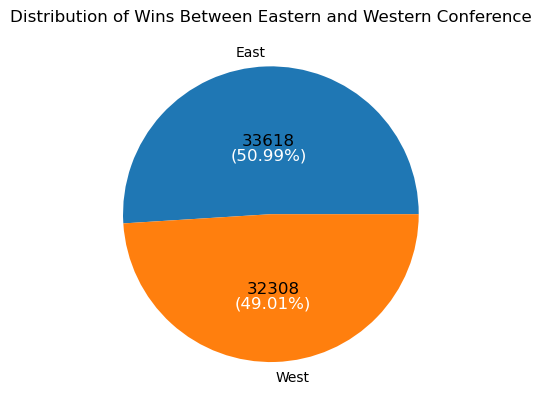

In [11]:
#Creating a pie chart to compare wins between conference.
fig, ax = plt.subplots()

wedges, texts = ax.pie(sizes, labels = labels)

for wedge, size in zip(wedges, sizes):
   
    angle = (wedge.theta1 + wedge.theta2) / 2  
    x_text = np.cos(np.radians(angle)) * 0.5  
    y_text = np.sin(np.radians(angle)) * 0.5 

    plt.text(x_text, y_text, f'{size}', ha='center', va='center', fontsize=12, color='black')

    plt.text(x_text, y_text-0.1, f'({np.round(size/(all_time_df['Total Wins'].sum())*100, 2)}%)', ha='center', va='center', fontsize=12, color='white')

plt.title("Distribution of Wins Between Eastern and Western Conference")

plt.show()

In [12]:
#Summing up total losses using subset from before.
el = east_subset['Total Losses'].values.sum()
wl = west_subset['Total Losses'].values.sum()
sizes = [el, wl]

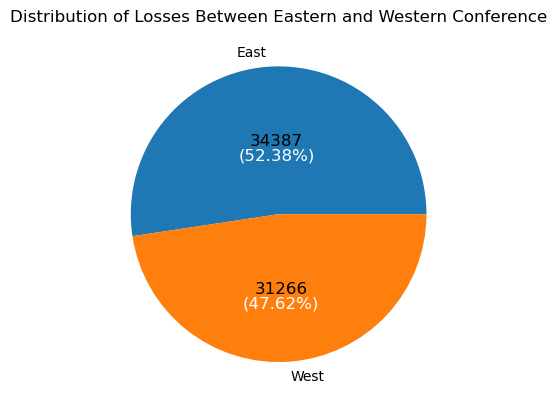

In [13]:
#Creating a similar pie chart for all time losses.
fig, ax = plt.subplots()

ax.pie(sizes, labels = labels)

for wedge, size in zip(wedges, sizes):
   
    angle = (wedge.theta1 + wedge.theta2) / 2  
    x_text = np.cos(np.radians(angle)) * 0.5  
    y_text = np.sin(np.radians(angle)) * 0.5 

    plt.text(x_text, y_text, f'{size}', ha='center', va='center', fontsize=12, color='black')

    plt.text(x_text, y_text-0.1, f'({np.round(size/(all_time_df['Total Losses'].sum())*100, 2)}%)', ha='center', va='center', fontsize=12, color='white')

plt.title("Distribution of Losses Between Eastern and Western Conference")

plt.show()

In [14]:
#Counting the number of championships by conference.
champs = ["Golden State Warriors", "Washington Wizards", "Los Angeles Lakers", "Los Angeles Lakers", "Sacramento Kings", "Los Angeles Lakers", "Los Angeles Lakers", "Los Angeles Lakers", "Philadelphia 76ers", "Golden State Warriors", "Boston Celtics", "Atlanta Hawks", "Boston Celtics", "Boston Celtics", "Boston Celtics", "Boston Celtics", "Boston Celtics", "Boston Celtics", "Boston Celtics", "Boston Celtics", "Philadelphia 76ers", "Boston Celtics", "Boston Celtics", "New York Knicks", "Milwaukee Bucks", "Los Angeles Lakers", "New York Knicks", "Boston Celtics", "Golden State Warriors", "Boston Celtics", "Portland Trail Blazers", "Washington Wizards", "Oklahoma City Thunder", "Los Angeles Lakers", "Boston Celtics", "Los Angeles Lakers", "Philadelphia 76ers", "Boston Celtics", "Los Angeles Lakers", "Boston Celtics", "Los Angeles Lakers", "Los Angeles Lakers", "Detroit Pistons", "Detroit Pistons", "Chicago Bulls", "Chicago Bulls", "Chicago Bulls", "Houston Rockets", "Houston Rockets", "Chicago Bulls", "Chicago Bulls", "Chicago Bulls", "San Antonio Spurs", "Los Angeles Lakers", "Los Angeles Lakers", "Los Angeles Lakers", "San Antonio Spurs", "Detroit Pistons", "San Antonio Spurs", "Miami Heat", "San Antonio Spurs", "Boston Celtics", "Los Angeles Lakers", "Los Angeles Lakers", "Dallas Mavericks", "Miami Heat", "Miami Heat", "San Antonio Spurs", "Golden State Warriors", "Cleveland Cavaliers", "Golden State Warriors", "Golden State Warriors", "Toronto Raptors", "Los Angeles Lakers", "Milwaukee Bucks", "Golden State Warriors", "Denver Nuggets", "Boston Celtics"]
ecount = 0
wcount = 0
def champcount(x):
    global ecount, wcount
    for i in x:
        if i in east:
            ecount += 1
        if i in west:
            wcount += 1
        
    return ecount, wcount     
champcount(champs[29:])

(23, 26)

In [15]:
sizes = [ecount, wcount]
colors = ['green', 'gold']

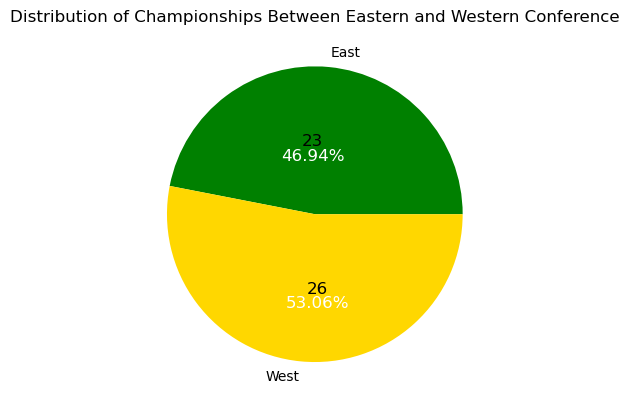

In [16]:
#Creating one final pie chart to compare the total number of championships.
fig, ax = plt.subplots()

ax.pie(sizes, labels = labels, colors = colors)

for wedge, size in zip(wedges, sizes):
   
    angle = (wedge.theta1 + wedge.theta2) / 2  
    x_text = np.cos(np.radians(angle)) * 0.5  
    y_text = np.sin(np.radians(angle)) * 0.5 

    plt.text(x_text, y_text, f'{size}', ha='center', va='center', fontsize=12, color='black')

    plt.text(x_text, y_text-0.1, f'{np.round(size/49 * 100, 2)}%', ha='center', va='center', fontsize=12, color='white')

plt.title("Distribution of Championships Between Eastern and Western Conference")

plt.show()

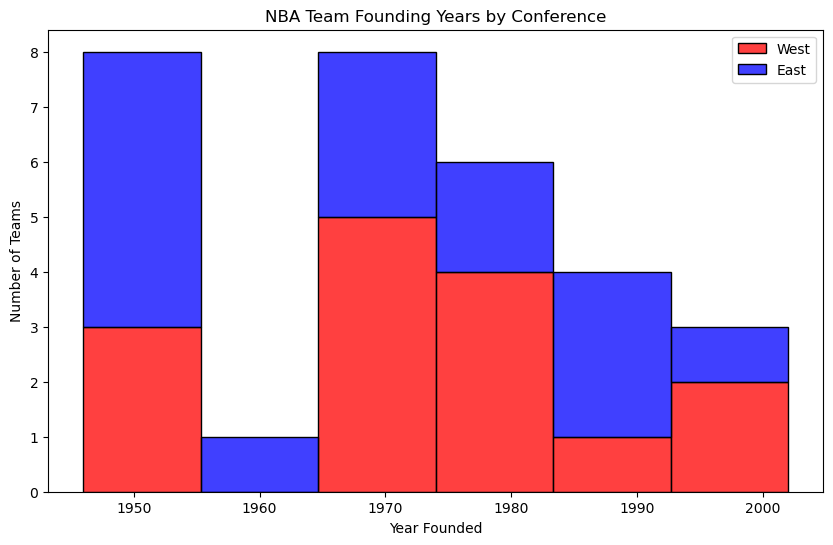

In [17]:
#Creating a histogram to compare the years of founding between conference.
plt.figure(figsize=(10, 6))
sns.histplot(data=all_time_df, x="First Year", hue="Conference", multiple = 'stack', palette={"East": "blue", "West": "red"})

plt.xlabel("Year Founded")
plt.ylabel("Number of Teams")
plt.title("NBA Team Founding Years by Conference")
plt.legend(labels = ['West', 'East'])

plt.show()

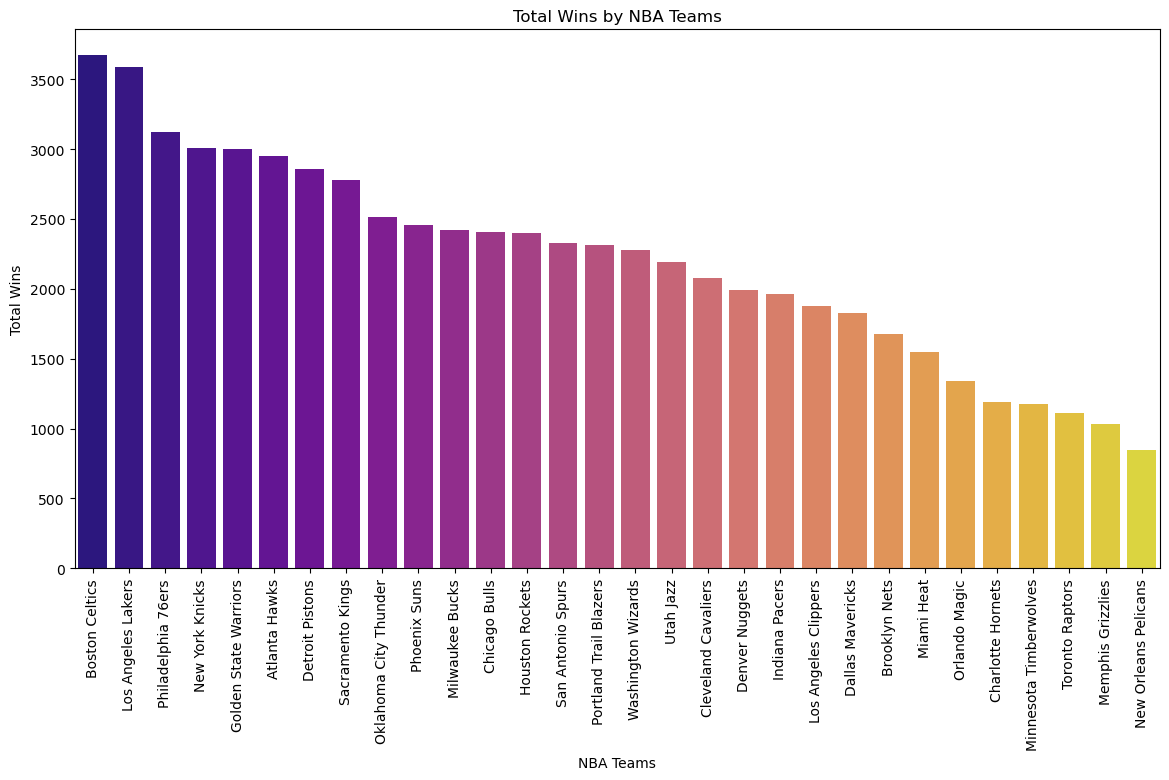

In [18]:
#Creating a bar plot to compare wins by team, sorted in descending order.
sortwin = all_time_df.sort_values(by = 'Total Wins', ascending = False)


plt.figure(figsize = (14, 7))
sns.barplot(data = sortwin, x = 'Teams', y = 'Total Wins', hue = 'Teams', palette = 'plasma')

#Rotating team names code from https://matplotlib.org/3.4.3/gallery/ticks_and_spines/ticklabels_rotation.html
plt.xticks(rotation=90)

plt.xlabel("NBA Teams")
plt.ylabel("Total Wins")
plt.title("Total Wins by NBA Teams")

plt.show()

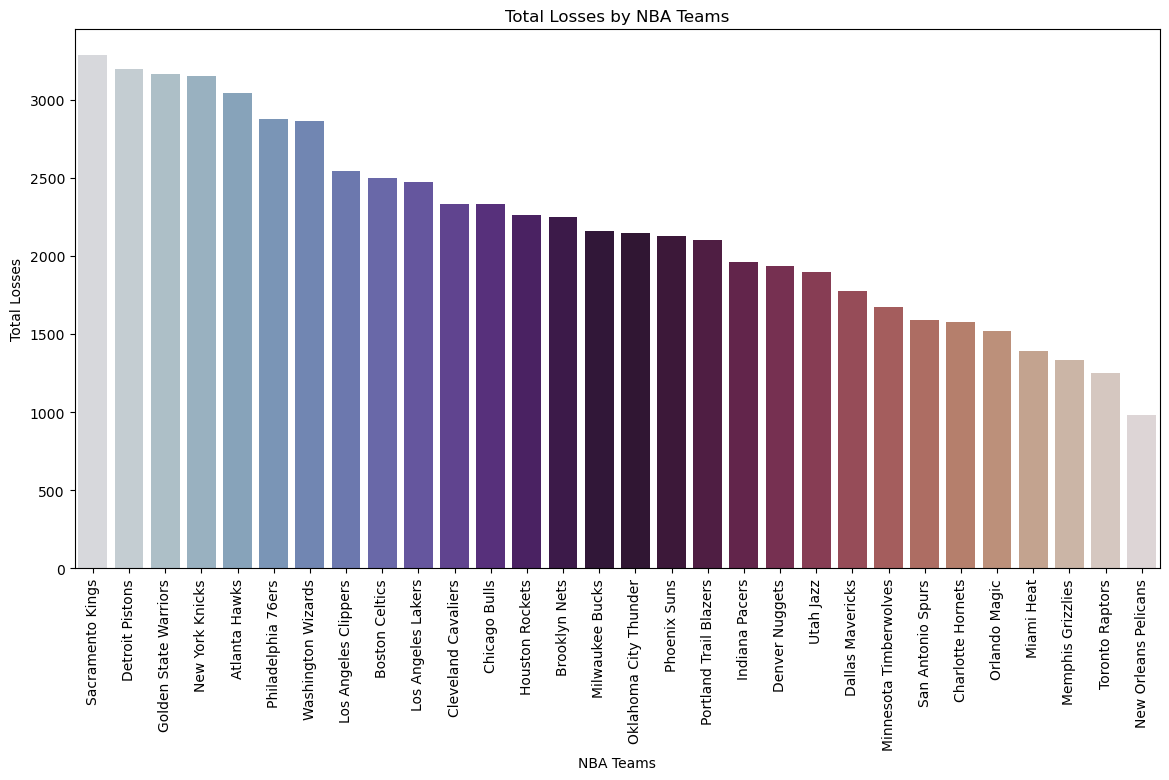

In [19]:
#Creating a bar plot to compare losses by team, in descending order.
sortloss = all_time_df.sort_values(by = 'Total Losses', ascending = False)

plt.figure(figsize = (14, 7))
sns.barplot(data = sortloss, x = 'Teams', y = 'Total Losses', hue = 'Teams', palette = 'twilight')

plt.xticks(rotation=90)

plt.xlabel("NBA Teams")
plt.ylabel("Total Losses")
plt.title("Total Losses by NBA Teams")

plt.show()

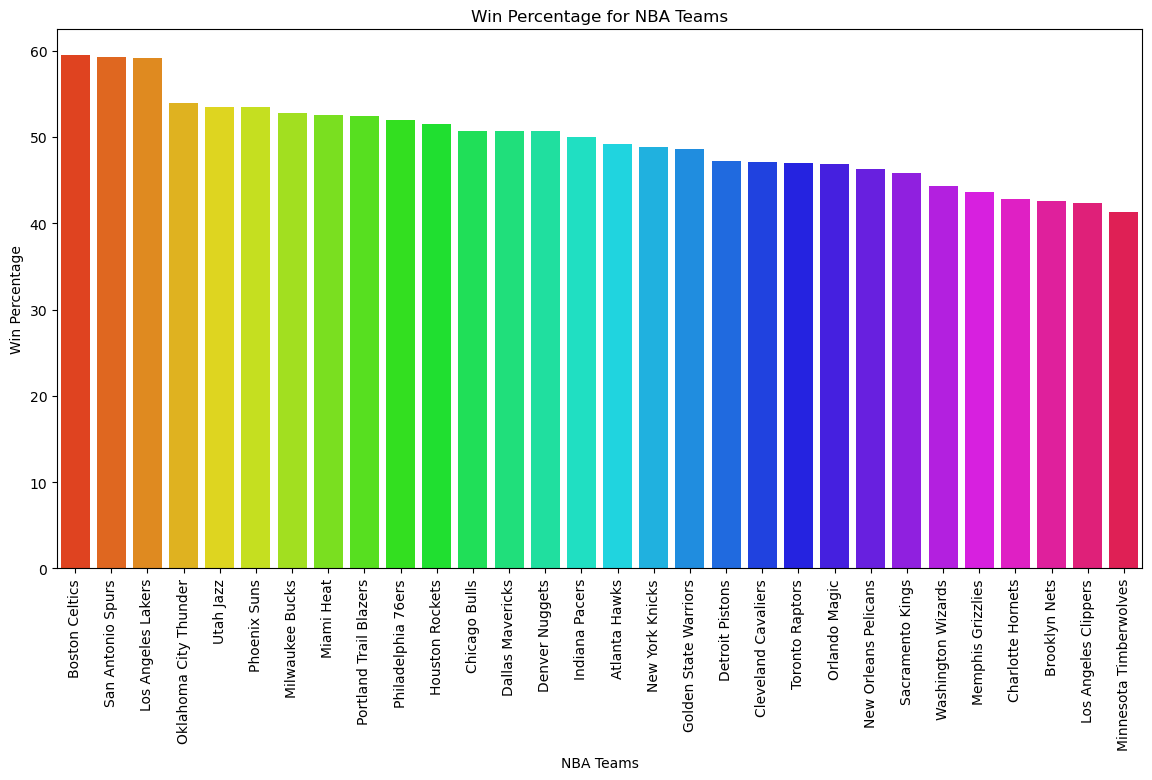

In [20]:
#Creating a bar plot to compare win percentage by team, in descending order.
sortpct = all_time_df.sort_values(by = 'Win Percentage', ascending = False)

plt.figure(figsize = (14, 7))
sns.barplot(data = sortpct, x = 'Teams', y = 'Win Percentage', hue = 'Teams', palette = 'hsv')

plt.xticks(rotation=90)

plt.xlabel("NBA Teams")
plt.ylabel("Win Percentage")
plt.title("Win Percentage for NBA Teams")

plt.show()

In [21]:
#Converting the champs list into a data frame in order to count team championships in a new data frame.
df = pd.DataFrame({"Team": champs})

team_champ_counts = df["Team"].value_counts()
team_champ_counts = pd.DataFrame({"Team": team_champ_counts.index, 
                                  "Championships": team_champ_counts.values})


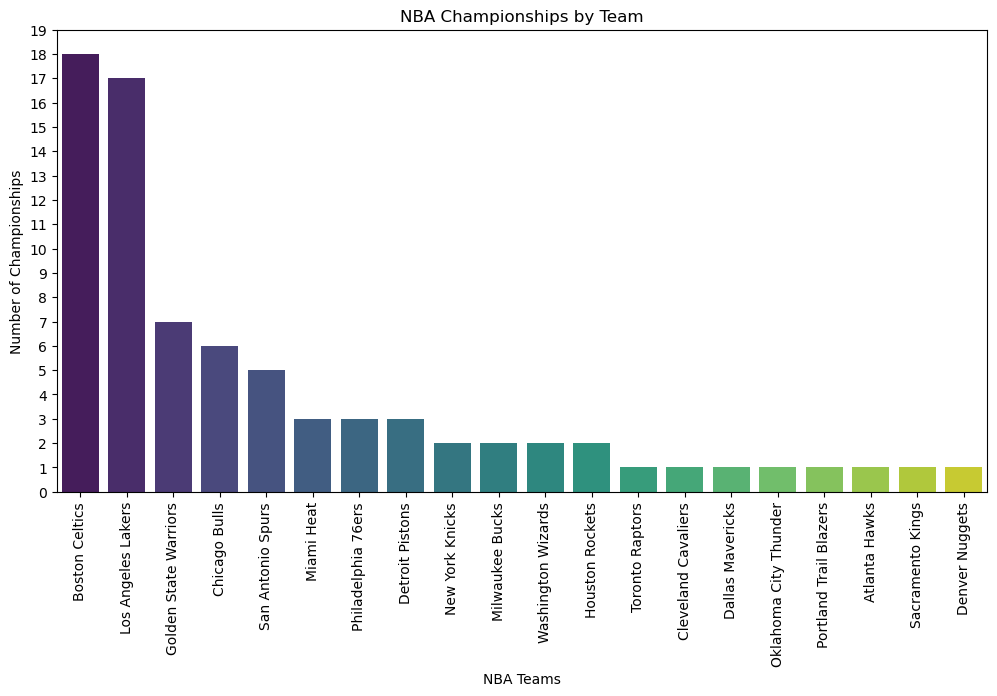

In [26]:
#Plotting championships by team, showing only teams with at least one championship.
plt.figure(figsize=(12, 6))
sns.barplot(data=team_champ_counts, x = "Team", y = "Championships", hue = 'Team', palette="viridis")

plt.xticks(rotation=90)
tlist = np.arange(0,20)

plt.yticks(ticks = (tlist))

plt.xlabel("NBA Teams")
plt.ylabel("Number of Championships")
plt.title("NBA Championships by Team")

plt.show()